In [1]:
import data
import os, glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
d = data.ClogData('/ssd_icybox2_1TB/jason/clog-loss-data/', size='nano')

In [3]:
d.crop_videos()

  0%|          | 0/1468 [00:00<?, ?it/s]

CROPPING ALL VIDEOS TO SIZE  (150, 150) ...


100%|██████████| 1468/1468 [09:07<00:00,  2.68it/s]


In [5]:
dmicro = data.ClogData('/ssd_icybox2_1TB/jason/clog-loss-data/', size='micro')

DOWNLOADING AND EXTRACTING micro DATA...


In [6]:
dmicro.crop_videos()

  0%|          | 0/2399 [00:00<?, ?it/s]

CROPPING ALL VIDEOS TO SIZE  (150, 150) ...


100%|██████████| 2399/2399 [16:03<00:00,  2.49it/s]


In [8]:
cap = cv2.VideoCapture(d.vids[1])

In [9]:
ret, frame = cap.read()

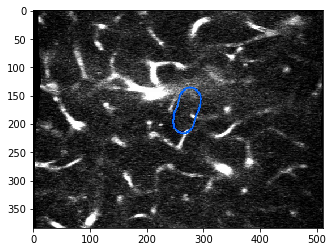

In [10]:
plt.imshow(frame)

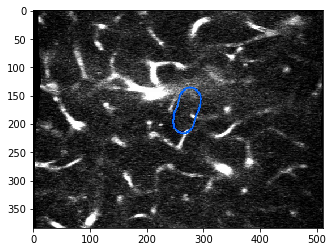

In [22]:
plt.imshow(frame)

In [147]:
ii = 0

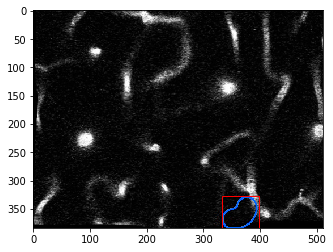

In [172]:
ii = ii+1
cap = cv2.VideoCapture(vids[ii])
ret, frame = cap.read()

threshold = [[9,98],[13,143],[104,255]]

mask = np.ones(frame.shape[0:2])

for i in range(len(threshold)):
    mask = np.all([mask, frame[:,:,i] >= threshold[i][0], frame[:,:,i] <= threshold[i][1]], axis=0)

from skimage.measure import regionprops
from matplotlib.patches import Rectangle

props = regionprops(mask.astype(int))
prop = props[np.argmax([p.area for p in props])]
bbox = prop.bbox

plt.imshow(frame)
plt.gca().add_patch(Rectangle((bbox[1], bbox[0]), bbox[3]-bbox[1], bbox[2]-bbox[0],linewidth=1,edgecolor='r',facecolor='none'))

In [184]:
os.path.splitext('/test/test/vid_cropped.mp5')[0][-7:] == 'cropped'

True

In [186]:
def crop(img, bbox):
    return img[bbox[0]:bbox[2], bbox[1]:bbox[3],:]

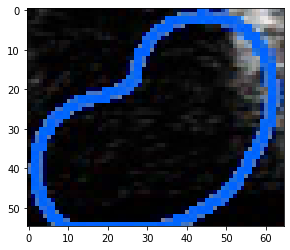

In [187]:
plt.imshow(crop(frame,bbox))

In [11]:
np.max(frame)

255

In [8]:
vid = cv2.VideoCapture(os.path.join(d.path, '115374_cropped.mp4'))

In [9]:
ret,frame = vid.read()

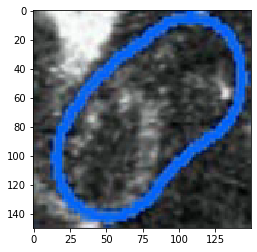

In [10]:
plt.imshow(frame)

In [16]:
from skimage.transform import resize

In [18]:
f = resize(frame, (150,150)) 

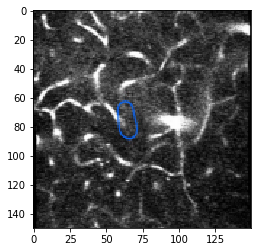

In [26]:
plt.imshow((f*255).astype(np.uint8))